# Урок 6. Регрессионные модели

## Домашнее задание  
На прошлых занятиях вы иногда формировали гипотезы, в которых ЗП была бинарной, а НП — непрерывной. Теперь вы можете проверить их корректно.

Попробуйте сгенерировать несколько выборок из имеющихся данных (вы уже знаете как), создать регрессионные модели по выбору и протестировать их предиктивную способность на сгенерированных данных. Не забывайте про оценку качества и доверительные интервалы.

Задание выполняется на языке R и предоставляется в формате Google Colab

### Загрузка библиотек и чтение файлов

In [2]:
install.packages("tidyverse")
install.packages("readxl")
install.packages("writexl")
install.packages("ggplot2")
install.packages("gplots")
install.packages("skimr")
install.packages("psych")
# install.packages("gridExtra")
# install.packages("moments")
install.packages("fitdistrplus")
# install.packages("data.table")
install.packages("car")
# install.packages("rstatix")
# install.packages("emmeans")
# install.packages("ez")
install.packages("MASS")
# install.packages("tidyr")
install.packages("stats")

# install.packages("simpleboot")
# install.packages("coin")
install.packages("boot")
# install.packages("jackknifeR")

install.packages("MuMIn")
# install.packages("caret")
# install.packages("resample")
install.packages("corrplot")
install.packages("pROC")
# install.packages("lme4")
# install.packages("nnet")
# install.packages("plotly")
# install.packages("fastDummies")
# install.packages("yardstick")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘GPArotation’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘n

In [3]:
library(tidyverse)
library(dplyr)
require(readxl)
library(writexl)
library(ggplot2)
library(gplots)
library(skimr)
library(psych)
# library(gridExtra)
# library(moments)
library(car)
library(fitdistrplus)
# library(rstatix)
# library(emmeans)
# library(ez)
library(MASS)
# library(tidyr)
library(stats)

# library(tibble)
# library(dplyr)
# library(simpleboot)
# library(coin)
library(boot)
# library(jackknifeR)

library(MuMIn)
# library(caret)
# library(resample)
library(corrplot)
library(pROC)
# library(lme4)
# library(nnet)
# library(plotly)
# library(fastDummies)
# library(yardstick)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: readxl


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:psych’:

    logit


The following object is masked from ‘package:dplyr’:

    recode


The fo

In [4]:
data <- read_xlsx("/content/21_6_files/data.xlsx", sheet = 1) %>%
  rename_with(make.names)
data

New names:
• `Choi...25` -> `Choi...21`
• `Tgi...26` -> `Tgi...22`
• `HDLi...27` -> `HDLi...23`
• `LDLi...28` -> `LDLi...24`
• `Choi...29` -> `Choi...25`
• `Tgi...30` -> `Tgi...26`
• `HDLi...31` -> `HDLi...27`
• `LDLi...32` -> `LDLi...28`


Vial.number,Group,Age,Plasma.volume,Ht,Wt,BMI,Sys,Dia,PR,⋯,G1.LDLi,G2.LDLi,G3.LDLi,S0.LDLi,S1.LDLi,S2.LDLi,S3.LDLi,B.LDLi,F.LDLi,HM.LDLi
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,63,6.5,163,84.0,31.61579,125,76,67,⋯,4.090,68.910,3.570,3.980,28.180,42.460,1.950,0.020,1.67,13.02
2,0,47,5.5,179,111.0,34.64311,125,82,65,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,1,57,7.0,164,80.0,29.74420,132,80,92,⋯,5.160,68.220,3.110,4.640,30.430,39.860,1.560,0.020,1.69,14.16
4,1,72,5.0,160,58.8,22.96875,130,90,68,⋯,3.950,68.030,4.500,3.780,29.370,41.130,2.200,0.020,1.89,13.89
5,1,57,5.0,180,71.0,21.91358,135,75,70,⋯,4.630,66.910,4.030,4.440,28.540,40.640,1.950,0.020,2.03,14.25
6,1,79,6.2,160,64.0,25.00000,110,75,66,⋯,4.050,64.010,5.270,3.720,26.710,40.390,2.510,0.020,2.70,16.06
7,1,61,6.5,164,67.0,24.91077,124,82,84,⋯,4.100,65.990,4.700,4.030,28.440,39.990,2.330,0.020,1.61,13.82
8,1,70,5.5,162,61.0,23.24341,135,78,72,⋯,5.270,67.260,3.240,4.690,32.270,37.290,1.520,0.030,1.61,14.59
9,0,50,6.0,150,79.0,35.11111,142,95,88,⋯,3.970,67.590,4.220,4.420,27.990,41.190,2.180,0.050,1.55,13.26


In [5]:
names(data)

[1] "Vial.number"      "Group"            "Age"             
  [4] "Plasma.volume"    "Ht"               "Wt"              
  [7] "BMI"              "Sys"              "Dia"             
 [10] "PR"               "Sm"               "Dm"              
 [13] "HT"               "LVH"              "IHD"             
 [16] "MI"               "Str"              "A_C"             
 [19] "A_H"              "A_D"              "Choi...21"       
 [22] "Tgi...22"         "HDLi...23"        "LDLi...24"       
 [25] "Choi...25"        "Tgi...26"         "HDLi...27"       
 [28] "LDLi...28"        "AI"               "r.lat.min"       
 [31] "r.ant.min"        "r.pos.min"        "l.lat.min"       
 [34] "l.ant.min"        "l.pos.min"        "r.lat.max"       
 [37] "r.ant.max"        "r.pos.max"        "l.lat.max"       
 [40] "l.ant.max"        "l.pos.max"        "carotid.IMT.mean"
 [43] "Plaque"           "Statins"          "GPHDL1"          
 [46] "GPHDL2"           "GPHDL3"           "GPHDL4"          
 [49] "GPHDL5"           "GPHDL6"           "GPHDL7"          
 [52] "GPHDL8"           "GPHDL9"           "GPHDL10"         
 [55] "GPHDL11"          "GPHDL12"          "GPHDL13"         
 [58] "GPHDL14"          "GPHDL15"          "GPHDL16"         
 [61] "GPHDL17"          "GPHDL18"          "GPHDL19"         
 [64] "GPHDL20"          "GPHDL21"          "GPHDL22"         
 [67] "sum_auc.HDLi"     "LB.HDLi"          "HB.HDLi"         
 [70] "G1.HDLi"          "G2.HDLi"          "G3.HDLi"         
 [73] "S0.HDLi"          "S1.HDLi"          "S2.HDLi"         
 [76] "S3.HDLi"          "B.HDLi"           "F.HDLi"          
 [79] "HM.HDLi"          "GPLDL1"           "GPLDL2"          
 [82] "GPLDL3"           "GPLDL4"           "GPLDL5"          
 [85] "GPLDL6"           "GPLDL7"           "GPLDL8"          
 [88] "GPLDL9"           "GPLDL10"          "GPLDL11"         
 [91] "GPLDL12"          "GPLDL13"          "GPLDL14"         
 [94] "GPLDL15"          "GPLDL16"          "GPLDL17"         
 [97] "GPLDL18"          "GPLDL19"          "GPLDL20"         
[100] "GPLDL21"          "GPLDL22"          "sum_auc.LDLi"    
[103] "LB.LDLi"          "HB.LDLi"          "G1.LDLi"         
[106] "G2.LDLi"          "G3.LDLi"          "S0.LDLi"         
[109] "S1.LDLi"          "S2.LDLi"          "S3.LDLi"         
[112] "B.LDLi"           "F.LDLi"           "HM.LDLi"

In [6]:
# Создадим список колонок, которые мы переведем в Factor
factor_cols <- c("Vial.number", "Group", "Sm", "Dm", "HT", "LVH", "IHD", "MI", "Str", "A_C", "A_H", "A_D", "Plaque", "Statins")

In [7]:
# Напишем функцию, которая переведет колонки в Factor и Numeric

convert_columns <- function(data, columns) {
  data <- mutate(data, across(all_of(columns), as.factor),
                        across(!all_of(columns), as.numeric))
  return(data)
}

In [8]:
# Применим функцию к нашей объединённой таблице
data <- convert_columns(data, factor_cols)
data

Vial.number,Group,Age,Plasma.volume,Ht,Wt,BMI,Sys,Dia,PR,⋯,G1.LDLi,G2.LDLi,G3.LDLi,S0.LDLi,S1.LDLi,S2.LDLi,S3.LDLi,B.LDLi,F.LDLi,HM.LDLi
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,63,6.5,163,84.0,31.61579,125,76,67,⋯,4.090,68.910,3.570,3.980,28.180,42.460,1.950,0.020,1.67,13.02
2,0,47,5.5,179,111.0,34.64311,125,82,65,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,1,57,7.0,164,80.0,29.74420,132,80,92,⋯,5.160,68.220,3.110,4.640,30.430,39.860,1.560,0.020,1.69,14.16
4,1,72,5.0,160,58.8,22.96875,130,90,68,⋯,3.950,68.030,4.500,3.780,29.370,41.130,2.200,0.020,1.89,13.89
5,1,57,5.0,180,71.0,21.91358,135,75,70,⋯,4.630,66.910,4.030,4.440,28.540,40.640,1.950,0.020,2.03,14.25
6,1,79,6.2,160,64.0,25.00000,110,75,66,⋯,4.050,64.010,5.270,3.720,26.710,40.390,2.510,0.020,2.70,16.06
7,1,61,6.5,164,67.0,24.91077,124,82,84,⋯,4.100,65.990,4.700,4.030,28.440,39.990,2.330,0.020,1.61,13.82
8,1,70,5.5,162,61.0,23.24341,135,78,72,⋯,5.270,67.260,3.240,4.690,32.270,37.290,1.520,0.030,1.61,14.59
9,0,50,6.0,150,79.0,35.11111,142,95,88,⋯,3.970,67.590,4.220,4.420,27.990,41.190,2.180,0.050,1.55,13.26


На основе имеющиъся данных построим модель предсказывающую развитие Ишемической болезни сердца. Не смотря на то, что ИБС в данном датасете является фактором, тем не менее поробуем найти связь с другими переменными и построить модель предсказания. Для увеличения размера датасета применим bootstrap.

In [9]:
task_df <- data %>%
  dplyr::select(Wt, BMI, Choi...25, Tgi...26, HDLi...27, LDLi...28, carotid.IMT.mean, IHD)
task_df

Wt,BMI,Choi...25,Tgi...26,HDLi...27,LDLi...28,carotid.IMT.mean,IHD
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
84.0,31.61579,5.584416,2.4065934,1.696104,2.753247,0.6425000,0
111.0,34.64311,7.038961,1.6153846,1.353247,4.922078,0.8400000,0
80.0,29.74420,5.350649,1.6043956,1.002597,3.584416,0.8500000,1
58.8,22.96875,6.909091,1.4505495,1.348052,4.883117,0.8241667,0
71.0,21.91358,5.038961,1.1098901,1.994805,2.519481,1.0983333,1
64.0,25.00000,7.428571,1.3296703,1.607792,5.194805,0.8475000,1
67.0,24.91077,7.272727,1.2527473,1.587013,5.090909,0.6725000,1
61.0,23.24341,6.935065,1.5714286,1.480519,4.701299,0.7850000,1
79.0,35.11111,8.285714,3.3736264,1.742857,4.935065,0.8491667,0


In [10]:
table(task_df$IHD)


 0  1 
19 19 

Распределение в подгруппах 50/50. Это дополнительно усложняет задачу.

Построим матрицу корелляции столбцов. Используем эти сведения для дальнейшего тюнинга модели.

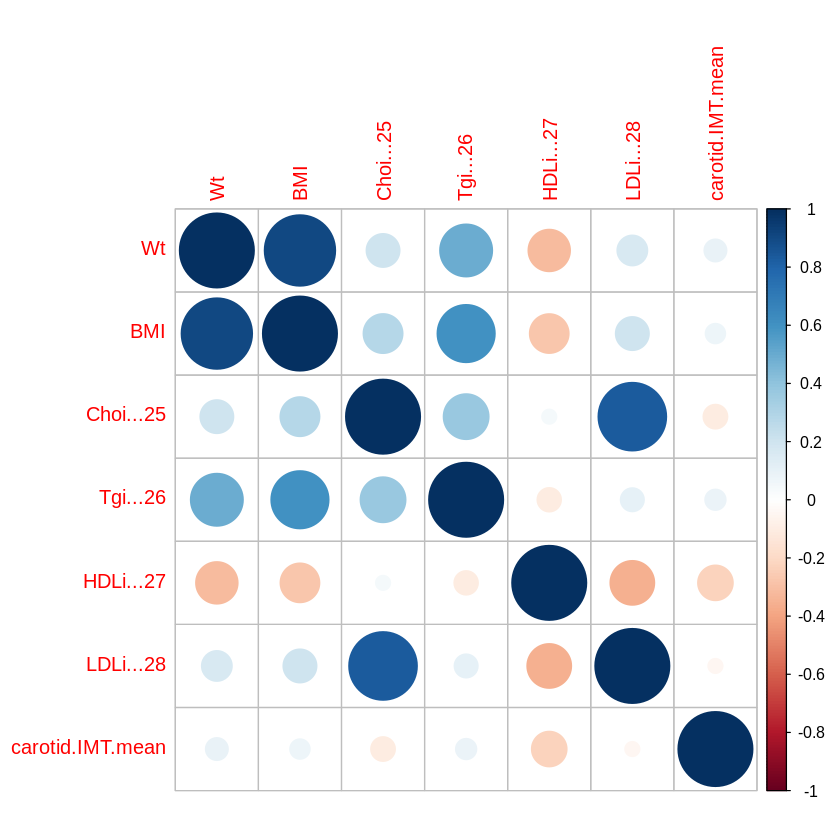

In [11]:
corrplot(cor(select_if(task_df, is.numeric)))

Видим сильную положительную корреляцию веса/ИМТ (что логично), также веса и ИМТ с триглицеридами (слабее). Сильная корреляция холестирина и ЛПНП. Есть слабая обратная корреляция веса и ИМТ с ЛПВП, а также ЛПВП и ЛПНП.

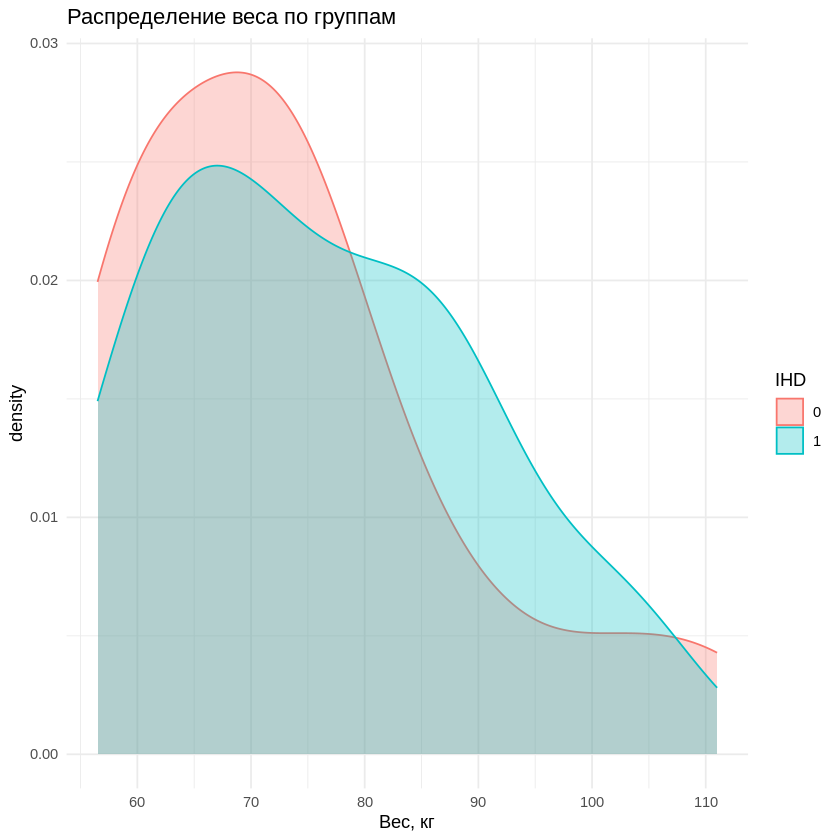

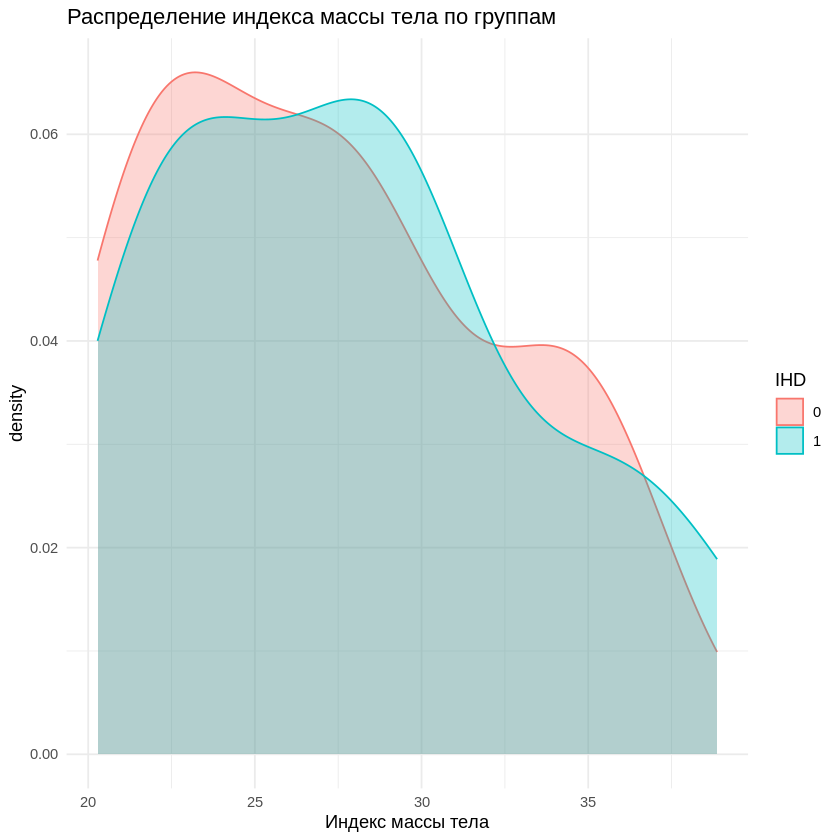

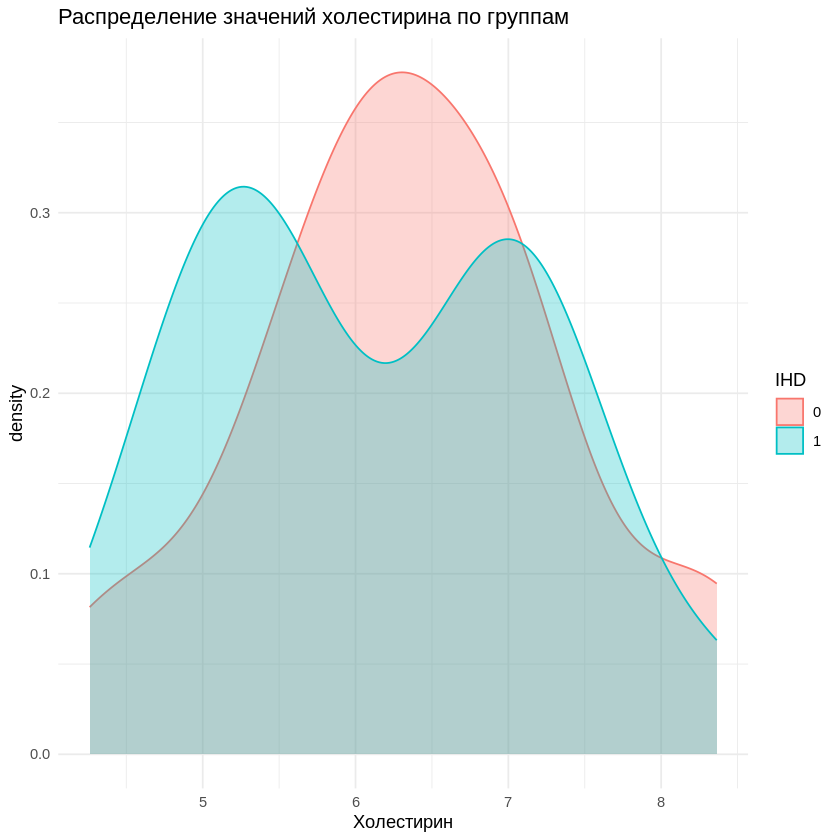

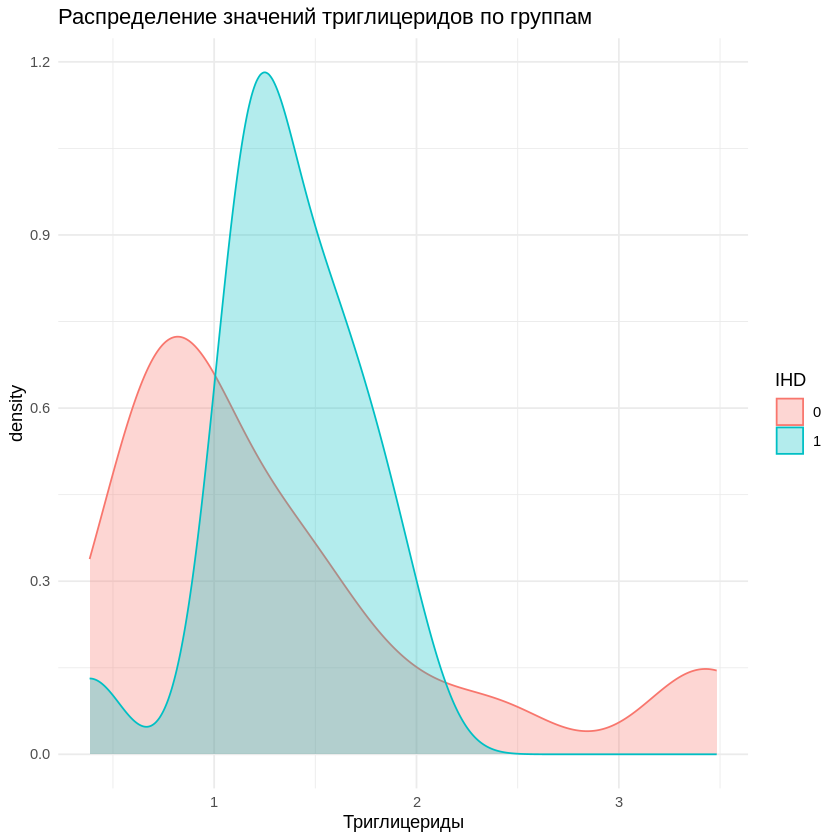

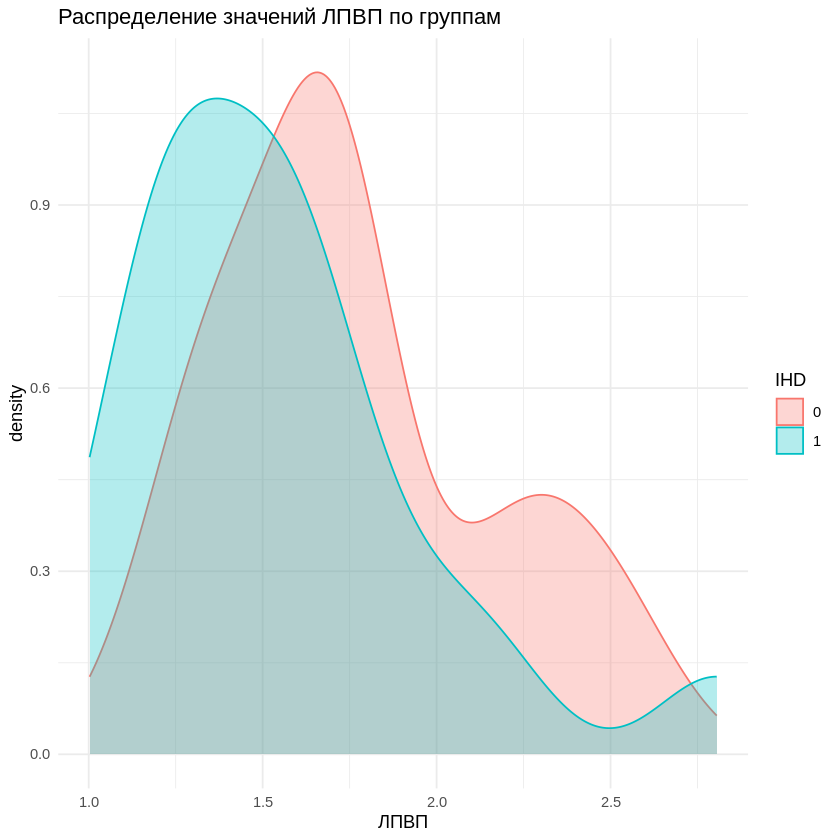

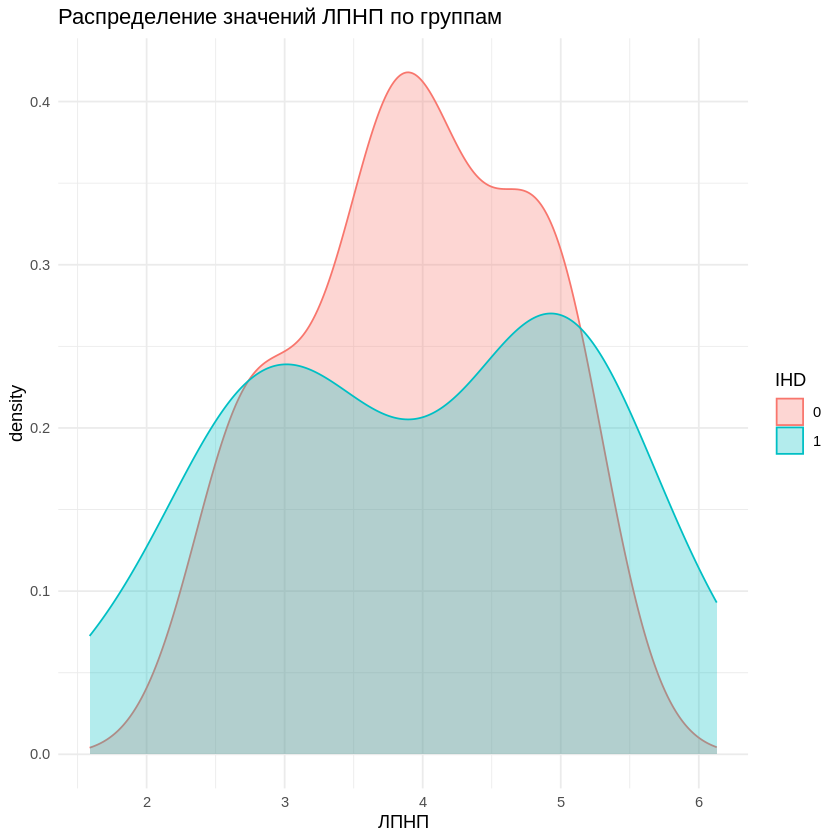

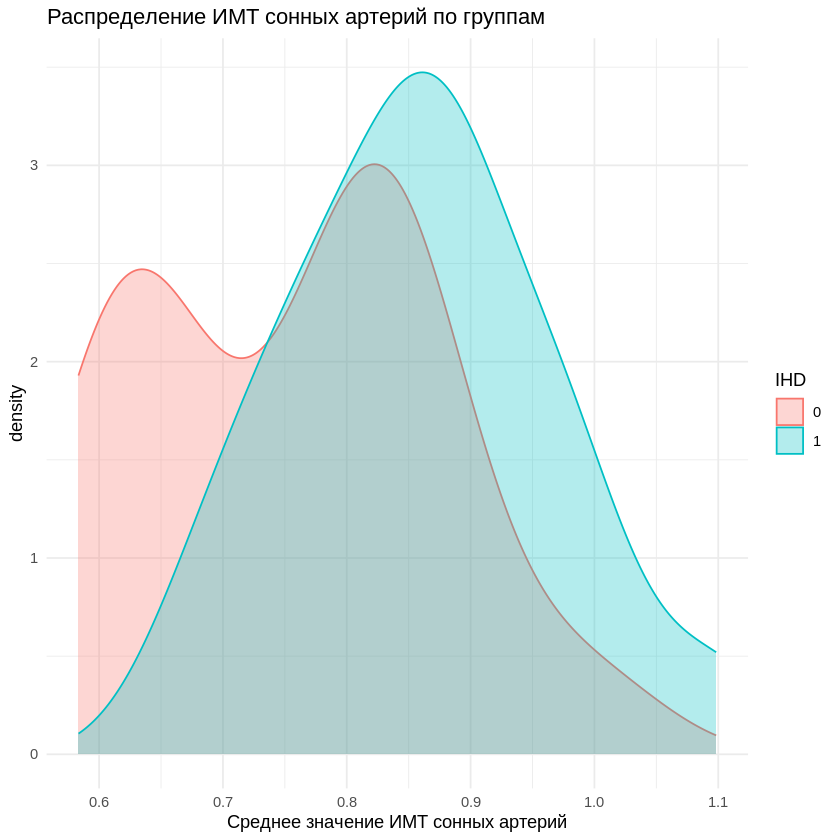

In [12]:
options(repr.plot.width = 7, repr.plot.height = 7)
# par(mfrow=c(4,1))

ggplot(task_df, aes(x = Wt, col = IHD, fill = IHD, group = IHD, na.rm = TRUE)) +
  geom_density(alpha=0.3) +
  labs(title = "Распределение веса по группам", x = "Вес, кг") +
  theme_minimal()

ggplot(task_df, aes(x = BMI, col = IHD, fill = IHD, group = IHD, na.rm = TRUE)) +
  geom_density(alpha=0.3) +
  labs(title = "Распределение индекса массы тела по группам", x = "Индекс массы тела") +
  theme_minimal()

ggplot(task_df, aes(x = Choi...25, col = IHD, fill = IHD, group = IHD, na.rm = TRUE)) +
  geom_density(alpha=0.3) +
  labs(title = "Распределение значений холестирина по группам", x = "Холестирин") +
  theme_minimal()

ggplot(task_df, aes(x = Tgi...26, col = IHD, fill = IHD, group = IHD, na.rm = TRUE)) +
  geom_density(alpha=0.3) +
  labs(title = "Распределение значений триглицеридов по группам", x = "Триглицериды") +
  theme_minimal()

ggplot(task_df, aes(x = HDLi...27, col = IHD, fill = IHD, group = IHD, na.rm = TRUE)) +
  geom_density(alpha=0.3) +
  labs(title = "Распределение значений ЛПВП по группам", x = "ЛПВП") +
  theme_minimal()

ggplot(task_df, aes(x = LDLi...28, col = IHD, fill = IHD, group = IHD, na.rm = TRUE)) +
  geom_density(alpha=0.3) +
  labs(title = "Распределение значений ЛПНП по группам", x = "ЛПНП") +
  theme_minimal()

ggplot(task_df, aes(x = carotid.IMT.mean, col = IHD, fill = IHD, group = IHD, na.rm = TRUE)) +
  geom_density(alpha=0.3) +
  labs(title = "Распределение ИМТ сонных артерий по группам", x = "Среднее значение ИМТ сонных артерий") +
  theme_minimal()

### Модель линейной регрессии на исходных данных без бутстраппинга

In [13]:
model_raw <- glm(IHD ~ Wt + BMI + Choi...25 + Tgi...26 + HDLi...27 + LDLi...28 + carotid.IMT.mean,
             data = data,
             family = binomial)

summary(model_raw)


Call:
glm(formula = IHD ~ Wt + BMI + Choi...25 + Tgi...26 + HDLi...27 + 
    LDLi...28 + carotid.IMT.mean, family = binomial, data = data)

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)      -4.276635   4.740151  -0.902   0.3669  
Wt                0.009891   0.061301   0.161   0.8718  
BMI              -0.007372   0.187119  -0.039   0.9686  
Choi...25        -0.099312   1.342990  -0.074   0.9411  
Tgi...26         -0.132589   0.949664  -0.140   0.8890  
HDLi...27        -1.031311   1.862621  -0.554   0.5798  
LDLi...28        -0.019455   1.362401  -0.014   0.9886  
carotid.IMT.mean  7.818165   3.553014   2.200   0.0278 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 52.679  on 37  degrees of freedom
Residual deviance: 43.655  on 30  degrees of freedom
AIC: 59.655

Number of Fisher Scoring iterations: 4


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC: 0.775623268698061"


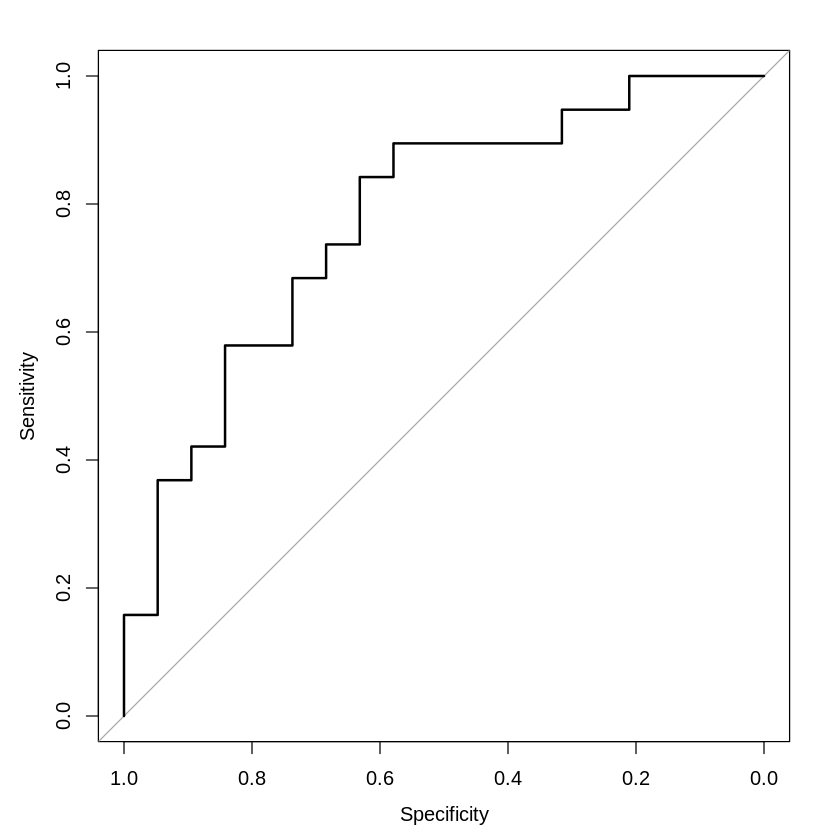

In [14]:
# Расчет предсказанных вероятностей
predicted_probabilities <- predict(model_raw, type = "response")
# Построение ROC-кривой для оценки модели
roc_curve <- roc(data$IHD, predicted_probabilities)
auc_value <- auc(roc_curve)
print(paste("AUC:", auc_value))
plot(roc_curve)

In [15]:
# Напишем функцию бутстраппинга данных с сохранением пропорций по группам IHD
 bootstrap_sample <- function(data, n) {
  data_0 <- data %>% filter(IHD == 0)
  data_1 <- data %>% filter(IHD == 1)

  n_0 <- nrow(data_0)
  n_1 <- nrow(data_1)

  sample_0 <- data_0[sample(1:n_0, size = round(n * n_0 / nrow(data)), replace = TRUE), ]
  sample_1 <- data_1[sample(1:n_1, size = round(n * n_1 / nrow(data)), replace = TRUE), ]

  sample <- bind_rows(sample_0, sample_1)
  return(sample)
}

In [16]:
# Увеличиваем количество строк до 3000
set.seed(123)
boot_df <- bootstrap_sample(task_df, 3000)

New names:
• `Choi...25` -> `Choi`
• `Tgi...26` -> `Tgi`
• `HDLi...27` -> `HDLi`
• `LDLi...28` -> `LDLi`
New names:
• `Choi...25` -> `Choi`
• `Tgi...26` -> `Tgi`
• `HDLi...27` -> `HDLi`
• `LDLi...28` -> `LDLi`


In [17]:
nrow(boot_df)

[1] 3000

### Модель со всеми параметрами и ее оценка

In [18]:
# Построение логистической регрессионной модели для предсказания ишемической болезни сердца
model_full <- glm(IHD ~ Wt + BMI + Choi + Tgi + HDLi + LDLi + carotid.IMT.mean,
                  data = boot_df,
                  family = binomial)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC: 0.783449777777778"


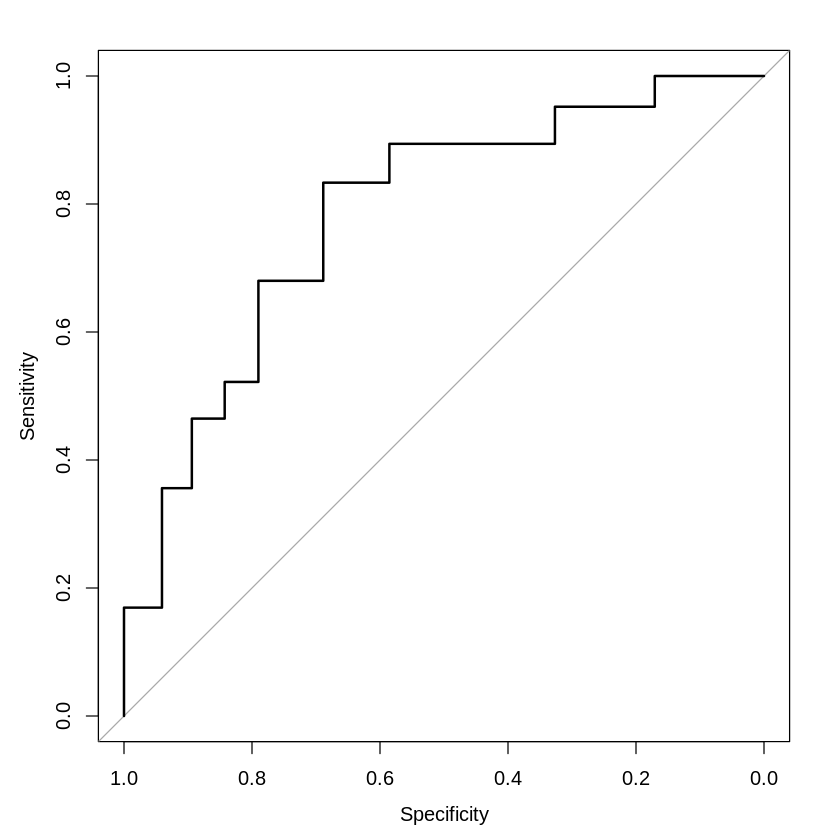

In [19]:
# Расчет предсказанных вероятностей
predicted_probabilities <- predict(model_full, type = "response")
# Построение ROC-кривой для оценки модели
roc_curve <- roc(boot_df$IHD, predicted_probabilities)
auc_value <- auc(roc_curve)
print(paste("AUC:", auc_value))
plot(roc_curve)

### Подбор оптимального сочетания параметров с помощью ```step```
Применим пошаговое тестирование моделей с разным сочетанием переменных и отберем модель с наименьшим $AIC$

In [20]:
# Создание списка параметров
parameters <- c("Wt", "BMI", "Choi", "Tgi", "HDLi", "LDLi", "carotid.IMT.mean")
parameters

[1] "Wt"               "BMI"              "Choi"             "Tgi"             
[5] "HDLi"             "LDLi"             "carotid.IMT.mean"

In [21]:
# Функция для создания всех возможных комбинаций параметров
all_combinations <- function(parameters) {
  comb_list <- list()
  for (i in 1:length(parameters)) {
    comb_list <- c(comb_list, combn(parameters, i, simplify = FALSE))
  }
  return(comb_list)
}

In [22]:
# Получение всех комбинаций
combinations <- all_combinations(parameters)

# Преобразование списка в более читаемый формат (data.frame)
combinations_df <- data.frame(
  Combination = sapply(combinations, function(x) paste(x, collapse = " + "))
)

cat(paste("Number of combinations:", nrow(combinations_df), "\n"))
sample_n(combinations_df, 7)

Number of combinations: 127 


Combination
<chr>
Wt + Choi + Tgi + HDLi + LDLi + carotid.IMT.mean
Choi + HDLi + carotid.IMT.mean
BMI + HDLi + LDLi
Wt + Choi
LDLi + carotid.IMT.mean
Wt + BMI + Choi + HDLi
BMI + Tgi + carotid.IMT.mean


In [23]:
# Создание пустого датафрейма для хранения моделей и их AIC
models_aic <- data.frame(Model = character(), AIC = numeric(), stringsAsFactors = FALSE)

# Цикл по всем комбинациям параметров для построения моделей и расчета их AIC
for (comb in combinations) {
  formula <- as.formula(paste("IHD ~", paste(comb, collapse = " + ")))
  model <- glm(formula, data = boot_df, family = binomial)
  model_aic <- AIC(model)

  # Сохранение модели и её AIC в датафрейм
  models_aic <- rbind(models_aic, data.frame(Model = paste(comb, collapse = " + "), AIC = model_aic))
}

In [24]:
# Сортировка моделей по AIC
sorted_models <- models_aic[order(models_aic$AIC), ]
print(sorted_models)

                                                     Model      AIC
81                      Wt + Tgi + HDLi + carotid.IMT.mean 3466.328
61                           Tgi + HDLi + carotid.IMT.mean 3466.751
110              Wt + Choi + Tgi + HDLi + carotid.IMT.mean 3466.853
113              Wt + Tgi + HDLi + LDLi + carotid.IMT.mean 3466.938
91                     BMI + Tgi + HDLi + carotid.IMT.mean 3467.209
95                    Choi + Tgi + HDLi + carotid.IMT.mean 3467.300
98                    Tgi + HDLi + LDLi + carotid.IMT.mean 3467.345
115             BMI + Choi + Tgi + HDLi + carotid.IMT.mean 3467.484
118             BMI + Tgi + HDLi + LDLi + carotid.IMT.mean 3467.522
58                          Choi + HDLi + carotid.IMT.mean 3468.082
106               Wt + BMI + Tgi + HDLi + carotid.IMT.mean 3468.297
97                   Choi + HDLi + LDLi + carotid.IMT.mean 3468.832
125       Wt + Choi + Tgi + HDLi + LDLi + carotid.IMT.mean 3468.850
121        Wt + BMI + Choi + Tgi + HDLi + caroti

**Есть более короткое решение**

In [25]:
# Проведение пошагового сравнения моделей с использованием AIC
stepwise_model <- step(model, direction = "both")

# Вывод сводки модели после пошагового сравнения
stepwise_summary <- summary(stepwise_model)
print(stepwise_summary)

Start:  AIC=3470.85
IHD ~ Wt + BMI + Choi + Tgi + HDLi + LDLi + carotid.IMT.mean

                   Df Deviance    AIC
- BMI               1   3454.8 3468.8
- LDLi              1   3454.9 3468.9
- Choi              1   3454.9 3468.9
- Wt                1   3455.5 3469.5
<none>                  3454.8 3470.8
- Tgi               1   3457.4 3471.4
- HDLi              1   3487.0 3501.0
- carotid.IMT.mean  1   3899.7 3913.7

Step:  AIC=3468.85
IHD ~ Wt + Choi + Tgi + HDLi + LDLi + carotid.IMT.mean

                   Df Deviance    AIC
- LDLi              1   3454.9 3466.9
- Choi              1   3454.9 3466.9
<none>                  3454.8 3468.8
- Wt                1   3457.3 3469.3
- Tgi               1   3457.6 3469.6
+ BMI               1   3454.8 3470.8
- HDLi              1   3487.2 3499.2
- carotid.IMT.mean  1   3901.8 3913.8

Step:  AIC=3466.85
IHD ~ Wt + Choi + Tgi + HDLi + carotid.IMT.mean

                   Df Deviance    AIC
- Choi              1   3456.3 3466.3
<none>       

**В результате подбора наименьшее значение $AIC$ показада модель с параметрами ```[Wt + Tgi + HDLi + carotid.IMT.mean]```. Оценим её.**

In [26]:
model <- glm(IHD ~ Wt + Tgi + HDLi + carotid.IMT.mean,
             data = boot_df,
             family = binomial)

summary(model)


Call:
glm(formula = IHD ~ Wt + Tgi + HDLi + carotid.IMT.mean, family = binomial, 
    data = boot_df)

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -4.205901   0.470097  -8.947  < 2e-16 ***
Wt                0.005623   0.003624   1.551  0.12079    
Tgi              -0.206789   0.071482  -2.893  0.00382 ** 
HDLi             -1.206211   0.119900 -10.060  < 2e-16 ***
carotid.IMT.mean  7.486416   0.388194  19.285  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 4158.9  on 2999  degrees of freedom
Residual deviance: 3456.3  on 2995  degrees of freedom
AIC: 3466.3

Number of Fisher Scoring iterations: 4


In [27]:
# Оценка производительности модели
# Расчет предсказанных вероятностей
predicted_probabilities <- predict(model, type = "response")

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC: 0.782966666666667"


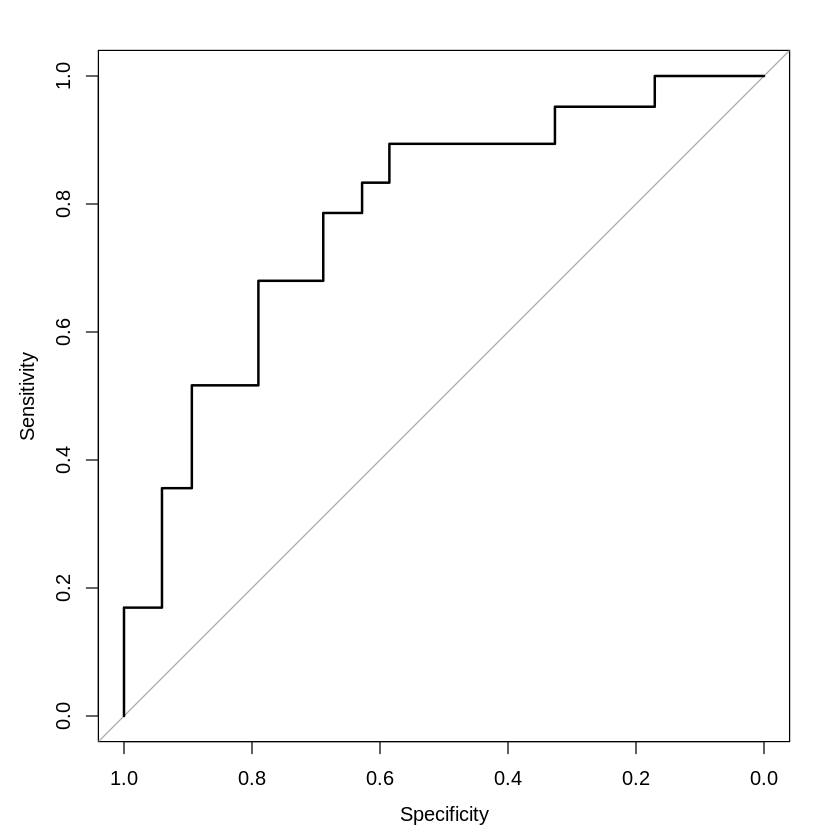

In [28]:
# Построение ROC-кривой для оценки модели
roc_curve <- roc(boot_df$IHD, predicted_probabilities)
auc_value <- auc(roc_curve)
print(paste("AUC:", auc_value))
plot(roc_curve)

In [44]:
# Вычисляем фактор инфляции дисперсии (VIF)
vif(model)

Wt              Tgi             HDLi carotid.IMT.mean 
        1.432296         1.345372         1.079589         1.003486

In [45]:
confint(model)

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),-5.134089067,-3.29079870
Wt,-0.001451582,0.01276185
Tgi,-0.347406953,-0.06701114
HDLi,-1.443808320,-0.97363506
carotid.IMT.mean,6.735279399,8.25748820


In [46]:
anova(model_full, model, test="LRT")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2992,3454.849,NA,NA,NA
2,2995,3456.328,-3,-1.479052,0.6871135


Тест ANOVA показывает отсутствие разницы между моделью с подобранными параметрами и моделью со всеми параметрами.

Найдем пороговые значения для каждой переменной, которые позволяют подозревать развитие ИБС.

In [62]:
# Функция для поиска оптимального порога
find_optimal_threshold <- function(variable, response) {
  roc_curve <- roc(response, variable)
  coords <- coords(roc_curve, "best", ret = "threshold", transpose = FALSE)
  return(coords)
}

# Список всех переменных модели
variables <- c("Wt", "BMI", "Choi", "Tgi", "HDLi", "LDLi", "carotid.IMT.mean")

# Создание пустого датафрейма для хранения переменных и их порогов
thresholds <- data.frame(Variable = character(), Threshold = numeric(), stringsAsFactors = FALSE)

# Цикл по всем переменным для нахождения оптимальных порогов
for (var in variables) {
  threshold <- find_optimal_threshold(boot_df[[var]], boot_df$IHD)
  thresholds <- rbind(thresholds, data.frame(Variable = var, Threshold = threshold))
}

# Вывод переменных и их порогов
print(thresholds)

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls > cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls > cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



          Variable  threshold
1               Wt 77.9000000
2              BMI 27.6787433
3             Choi  5.3766234
4              Tgi  0.9780220
5             HDLi  1.6207792
6             LDLi  5.0129870
7 carotid.IMT.mean  0.8433333


Найденные значения отсечек в принципе бесполезны, так как позволяют отнести к группе риска практически здоровых людей.

### Сохранение результатов модели в файлы

In [65]:
# Сохранение переменных и их порогов в CSV файл
write_xlsx(thresholds, "/content/21_6_files/variable_thresholds.xlsx")

In [66]:
# Сохранение новых данных с bootstrap в файл
write_xlsx(boot_df, "/content/21_6_files/bootstrap_samples.xlsx")

In [67]:
# Сохранение сводки модели и графика ROC-кривой
summary_text <- capture.output(summary(model))
writeLines(summary_text, "/content/21_6_files/model_summary.txt")
ggsave("/content/21_6_files/roc_curve.png")

Saving 6.67 x 6.67 in image
